<h1>Lesson 1. kNN on Iris dataset</h1>

<table>
  <tr>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" style="width:250px; height:200px;"></td>
    <td><img src="https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg" width="250px"></td>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/295px-Iris_virginica.jpg" width="250px"></td>
  </tr>
</table>
  
  <p>This exercise relates to the <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">iris data set</a>,
which contains the morphologic variation of Iris flowers of three related species (Iris setosa, Iris virginica and Iris versicolor).</p>
<p>Four features were measured from each observation (see image above):</p>
<ul>
<li>Sepal.Length - sepal length in centimeters</li>
<li>Sepal.Width - sepal width in centimeters</li>
<li>Petal.Length - petal length in centimeters</li>
<li>Petal.Width - petal width in centimeters</li>
<li>Species - species of the flower (our outcome variable)</li>
</ul>
<p>R has numerous datasets built into the environment. You can see them using this command:</p>
<code>library(help=datasets)</code>
<p>This dataset is built in under variable 'iris'. Let's see how it looks:</p>

In [1]:
str(iris)
head(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


<h3>Q.1. How many observations are present for each species?</h3>

In [2]:
summary(iris$Species)

setosa versicolor  virginica 
        50         50         50

<h3>Q.2. Plot the Sepal.Width vs. Sepal.Length, Petal.Width vs. Petal.Length, while color-coding the species.</h3> 

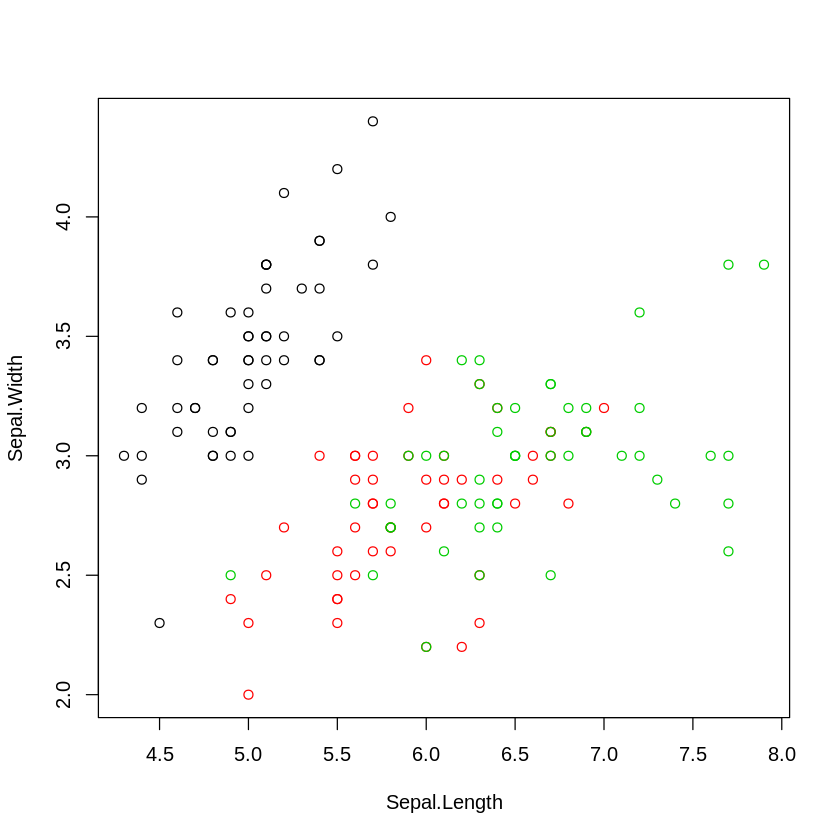

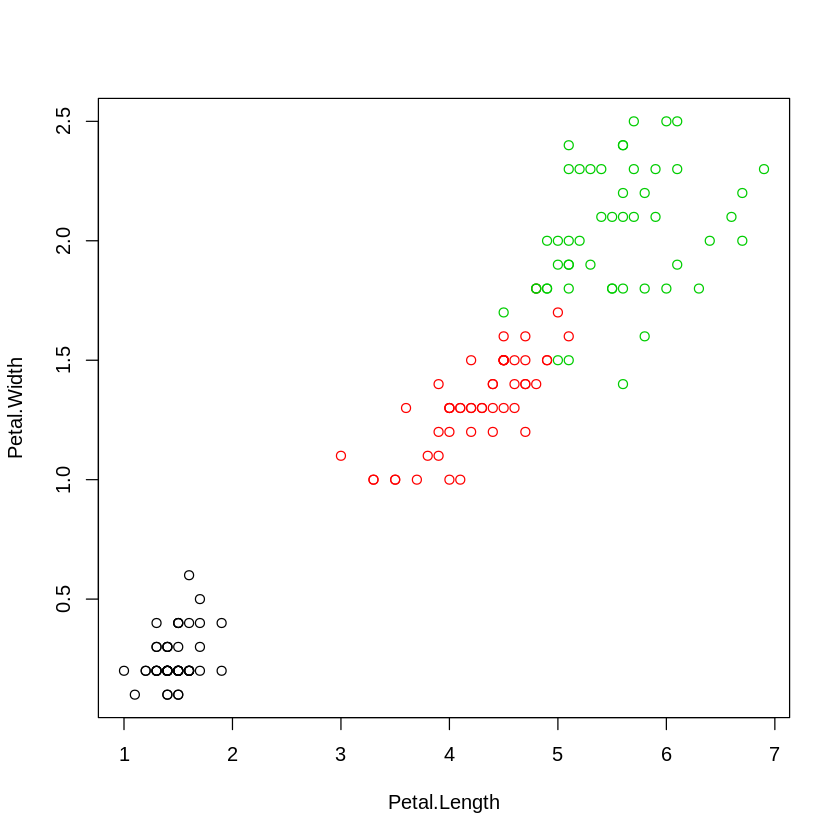

In [3]:
plot(Sepal.Width ~ Sepal.Length, data=iris, col=Species)
plot(Petal.Width ~ Petal.Length, data=iris, col=Species)

<h3>Q.3. Which of the plots allows for easier determination of the flower type?</h3>

In [5]:
Q.3 = "Petal.Width vs. Petal.Length"

<br>
<p>After the initial exploratory data analysis, let's split the data into 70% train and 30% test, to prepare for k-NN modelling:</p>

In [10]:
set.seed(123)
idx <- sample(2, nrow(iris), replace=TRUE, prob=c(0.7, 0.3))
trainData <- iris[idx==1,]
testData <- iris[idx==2,]

<h3>Q.4. On the Petal.Width vs. Petal.Length plot, display observations in train and test dataset in different colors.</h3>

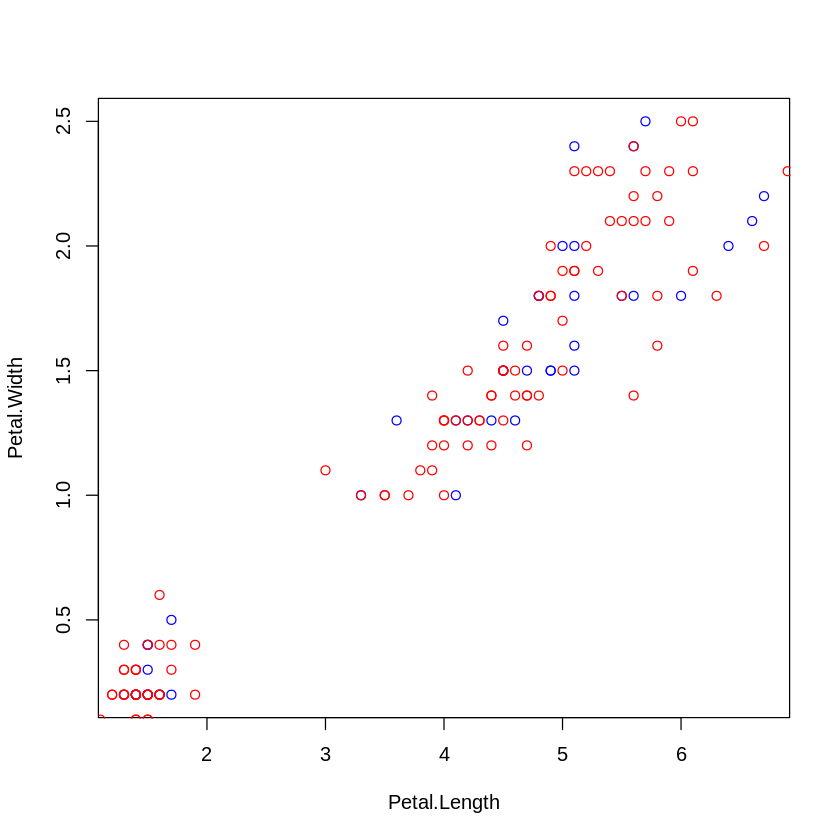

In [11]:
plot(Petal.Width ~ Petal.Length, data=testData, col="blue")
points(Petal.Width ~ Petal.Length, data=trainData, col="red")

<h3>Q.5. Complete the R command that performs k-NN fit using Petal.Width and Petal.Length only using 3 neighbors.</h3>

In [12]:
library(class)
fit <- knn(train = trainData[,c("Petal.Width", "Petal.Length")],
           test = testData[,c("Petal.Width", "Petal.Length")],
           cl= trainData$Species, k=3)

<h3>Q.6. How many class labels did your model predict correctly in the test set?</h3>

In [13]:
results <- testData$Species == fit
sum(results, na.rm=TRUE)

[1] 40

<h3>Q.7. How many classes did your model predict correctly, if you use all the features?</h3>

In [19]:
# Fit with all the features
allFit <- knn(
    train = trainData[,c("Petal.Width", "Petal.Length", "Sepal.Length", "Sepal.Width")],
    test = testData[,c("Petal.Width", "Petal.Length", "Sepal.Length", "Sepal.Width")],
    cl= trainData$Species, k=3)
# Evaluate the accuracy
allResults <- testData$Species == allFit
sum(allResults, na.rm=TRUE)

[1] 41

<h3>Q.8. Plot the model accuracy on the test set vs. number of neighbors used in the model (from 1 to 10).</h3>

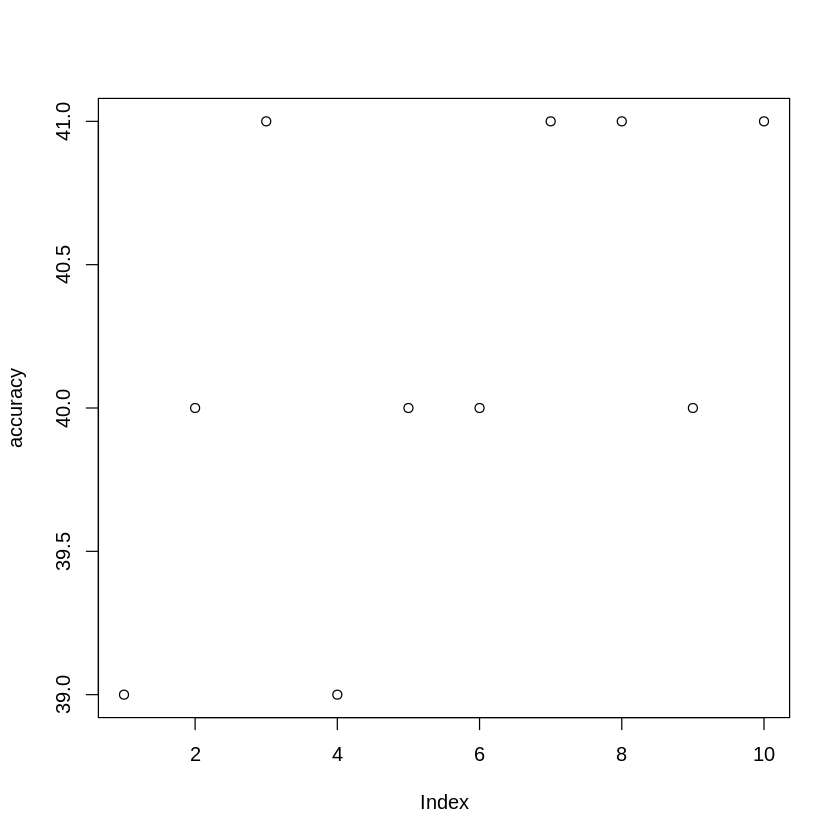

In [16]:
accuracy <- c()
for(n in 1:10) {
    # Fit the model with all the features
    fit <- knn(
        train = trainData[,c("Petal.Width", "Petal.Length", "Sepal.Length", "Sepal.Width")],
        test = testData[,c("Petal.Width", "Petal.Length", "Sepal.Length", "Sepal.Width")],
        cl= trainData$Species, k=n)
    # Evaluate accuracy and store it in the variable
    results <- testData$Species == fit
    accuracy[n]=sum(results, na.rm=TRUE)
}
# Plot the result
plot(accuracy)

<h3>Q.9. List three methods that can be used to improve prediction quality</h3>

In [17]:
# 1. use larger data set
# 2. distance weighting / feature weighting: due to previous data analysis it's possible
#    to say what features are more useful than others. Useful features should have more 
#    weight which reflects to different weighting of distances
# 3. data normalizing and unification (so we're sure that sepals and petals contribute
#    to result equally)